<a href="https://colab.research.google.com/github/douglascdsantos/tensao-deformacao-polimeros/blob/main/lab_polimeros_pratica_07_tensao_deformacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import  pandas            as      pd
import  seaborn           as      sns
import  matplotlib.pyplot as      plt
import  numpy             as      np
from    scipy.integrate   import  simps #https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html?highlight=simps#scipy.integrate.simpson
%matplotlib inline

In [67]:
url_cps = [
           'https://github.com/douglascdsantos/tensao-deformacao-polimeros/raw/main/Turma%202%20-%20CP%201.txt',
           'https://github.com/douglascdsantos/tensao-deformacao-polimeros/raw/main/Turma%202%20-%20CP%202.txt',
           'https://github.com/douglascdsantos/tensao-deformacao-polimeros/raw/main/Turma%202%20-%20CP%203.txt',
           'https://github.com/douglascdsantos/tensao-deformacao-polimeros/raw/main/Turma%202%20-%20CP%204.txt'
          ]
url_dim = 'https://github.com/douglascdsantos/tensao-deformacao-polimeros/raw/main/cps%20dimens%C3%B5es.csv'

In [68]:
dim = pd.read_csv(url_dim, sep = ';')
dim.drop(3, inplace = True)
dim.reset_index(drop=True,inplace = True)
dim

,amostra,largura 1,largura 2,largura 3,largura media,espessura 1,espessura 2,espessura 3,espessura media
0,PP 1,13.22,13.26,13.20,13.20,3.24,3.21,3.28,3.24
1,PP 2,13.35,13.06,13.19,13.20,3.37,3.28,3.28,3.31
2,PEAD 1,13.02,13.17,12.94,13.04,3.26,3.25,3.20,3.24
3,COMP 1,13.02,13.10,12.90,13.00,3.36,3.32,3.30,3.32
4,COMP 2,13.08,13.09,12.94,13.03,3.28,3.33,3.34,3.31


In [69]:
largura = dim.iloc[:,1:4]
largura.index = dim.iloc[:,0]
largura = largura.T.mean()
print("Largura:\n",largura)

espessura = dim.iloc[:,5:-1]
espessura.index = dim.iloc[:,0]
espessura = espessura.T.mean()
print("\nEspessura:\n",espessura)

area = espessura * largura
print("\nArea:\n",area)

Largura:
 amostra
PP 1      13.226667
PP 2      13.200000
PEAD 1    13.043333
COMP 1    13.006667
COMP 2    13.036667
dtype: float64

Espessura:
 amostra
PP 1      3.243333
PP 2      3.310000
PEAD 1    3.236667
COMP 1    3.326667
COMP 2    3.316667
dtype: float64

Area:
 amostra
PP 1      42.898489
PP 2      43.692000
PEAD 1    42.216922
COMP 1    43.268844
COMP 2    43.238278
dtype: float64


In [70]:
df_cps = {dim.amostra[k]: pd.read_csv(v, sep = '\t') for k,v in enumerate(url_cps)}

In [71]:
for k, df in df_cps.items():
  df['Tensão'] = df['Força(N)'] / area[k]
  df['Deformação'] = df['Deformação(mm)'] / largura[k]
#  df['Velocidade Deformação'] = df['Deformação(mm)'] / df['Tempo(s)']
  print('\n\n\t', k)
  display(df.head())



	 PP 1


,Tempo(s),Deformação(mm),Força(N),Tensão,Deformação
0,0.016667,0.000000,12.837,0.299241,0.000000
1,0.050000,0.000372,13.513,0.314999,0.000028
2,0.066667,0.001024,13.513,0.314999,0.000077
3,0.083333,0.001861,13.513,0.314999,0.000141
4,0.100000,0.002885,12.837,0.299241,0.000218




	 PP 2


,Tempo(s),Deformação(mm),Força(N),Tensão,Deformação
0,0.016667,0.000000,16.891,0.386593,0.000000
1,0.050000,0.000372,16.891,0.386593,0.000028
2,0.066667,0.001024,16.891,0.386593,0.000078
3,0.083333,0.001861,17.566,0.402042,0.000141
4,0.100000,0.002885,17.566,0.402042,0.000219




	 PEAD 1


,Tempo(s),Deformação(mm),Força(N),Tensão,Deformação
0,0.016667,0.000000,12.837,0.304072,0.000000
1,0.050000,0.000651,12.837,0.304072,0.000050
2,0.066667,0.001489,12.837,0.304072,0.000114
3,0.083333,0.002420,12.837,0.304072,0.000185
4,0.100000,0.003536,12.837,0.304072,0.000271




	 COMP 1


,Tempo(s),Deformação(mm),Força(N),Tensão,Deformação
0,0.016667,0.000000,12.837,0.296680,0.000000
1,0.050000,0.000372,12.161,0.281057,0.000029
2,0.066667,0.001024,12.161,0.281057,0.000079
3,0.083333,0.001954,12.837,0.296680,0.000150
4,0.100000,0.002978,12.161,0.281057,0.000229


In [72]:
def plotar(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(data = dataset, y = y, x = x)
  ax.figure.set_size_inches((12,8))
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_ylabel(labely, fontsize = 14)
  ax.set_xlabel(labelx, fontsize = 14);

In [77]:
def resultados(i,inicio_def = 0):
  print(f'{i}\nLimite de Resistência à tração (ou tensão na ruptura)(LRT): {round(df_cps[i].iloc[-1][-2],4)} MPa')

  print(f'Deformação na ruptura (ε): {round(df_cps[i].iloc[-1][-1],4)}')

  modulo_elasticidade = df_cps[i]['Tensão'].max() / (df_cps[i][df_cps[i]['Tensão'] == df_cps[i]['Tensão'].max()].iloc[0][-1] - inicio_def)
  print(f'Modulo de Elasticidade: {round(modulo_elasticidade,4)} MPa')

  print(f'Limite de Escoamento: {round(df_cps[i]["Tensão"].max(),4)} MPa')

  tenacidade = simps(np.array(df_cps[i]['Tensão']), x = np.array(df_cps[i]['Deformação']))
  print(f'Tenacidade: {round(tenacidade,4)} MPa')

  index_max = df_cps[i][df_cps[i]['Tensão'] == df_cps[i]['Tensão'].max()].index[0]
  modeulo_resiliencia = simps(np.array(df_cps[i].iloc[:index_max + 1]['Tensão']), x = np.array(df_cps[i].iloc[:index_max + 1]['Deformação']))
  print(f'Modulo Resiliencia: {round(modeulo_resiliencia,4)} MPa\n')
  plotar(f'Curva Tensão-Deformação {i}', 'Deformação (mm/mm)', 'Tensão (MPa)', 'Deformação', 'Tensão', df_cps[i])


PP 1
Limite de Resistência à tração (ou tensão na ruptura)(LRT): 4.6305 MPa
Deformação na ruptura (ε): 0.3513
Modulo de Elasticidade: 75.7273 MPa
Limite de Escoamento: 21.1989 MPa
Tenacidade: 3.0228 MPa
Modulo Resiliencia: 2.9829 MPa



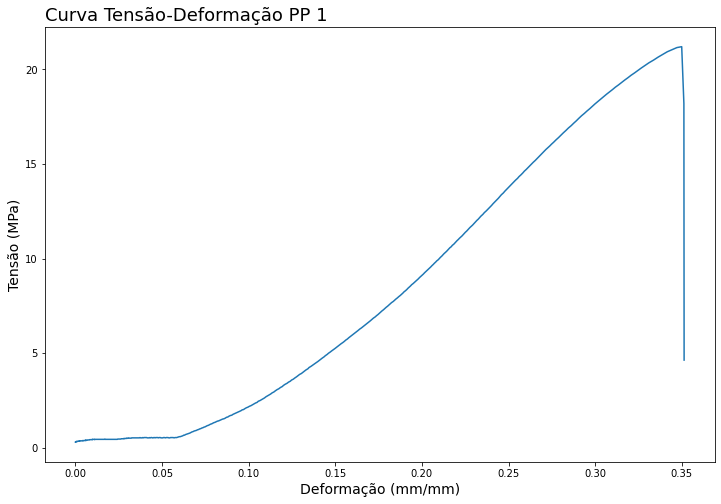

In [81]:
resultados('PP 1',0.07)

PP 2
Limite de Resistência à tração (ou tensão na ruptura)(LRT): 2.6133 MPa
Deformação na ruptura (ε): 0.2955
Modulo de Elasticidade: 72.3691 MPa
Limite de Escoamento: 18.3242 MPa
Tenacidade: 2.2708 MPa
Modulo Resiliencia: 2.2214 MPa



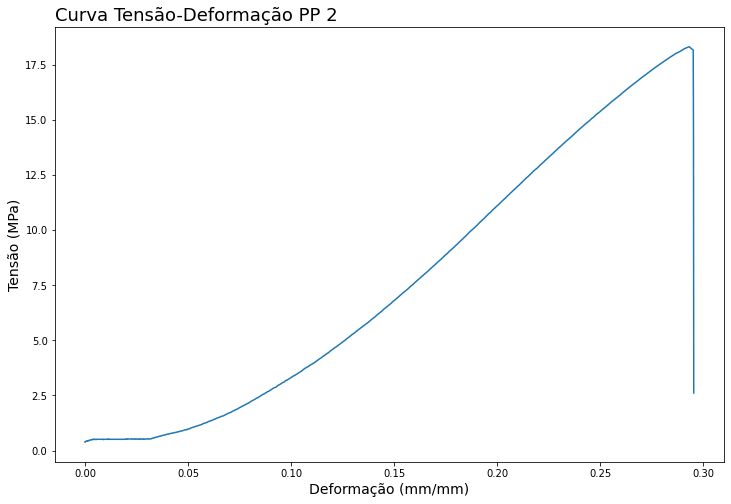

In [80]:
resultados('PP 2',0.04)

PEAD 1
Limite de Resistência à tração (ou tensão na ruptura)(LRT): 22.3093 MPa
Deformação na ruptura (ε): 13.5533
Modulo de Elasticidade: 54.1028 MPa
Limite de Escoamento: 32.1672 MPa
Tenacidade: 300.2263 MPa
Modulo Resiliencia: 16.7442 MPa



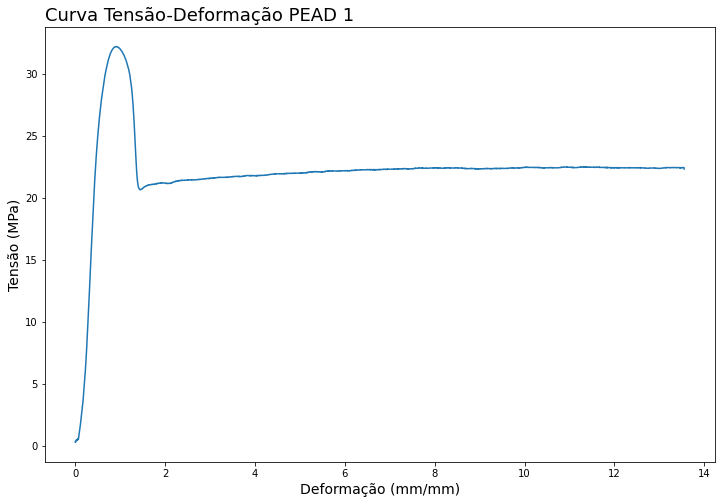

In [86]:
resultados('PEAD 1',0.3)

COMP 1
Limite de Resistência à tração (ou tensão na ruptura)(LRT): 13.3974 MPa
Deformação na ruptura (ε): 19.6046
Modulo de Elasticidade: 37.5212 MPa
Limite de Escoamento: 20.2991 MPa
Tenacidade: nan MPa
Modulo Resiliencia: 13.4977 MPa



/usr/local/lib/python3.7/dist-packages/scipy/integrate/_quadrature.py:414: RuntimeWarning: divide by zero encountered in true_divide
  h0divh1 = h0 / h1
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_quadrature.py:416: RuntimeWarning: divide by zero encountered in true_divide
  y[slice1] * (hsum * hsum / hprod) +
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_quadrature.py:417: RuntimeWarning: invalid value encountered in add
  y[slice2] * (2 - h0divh1))


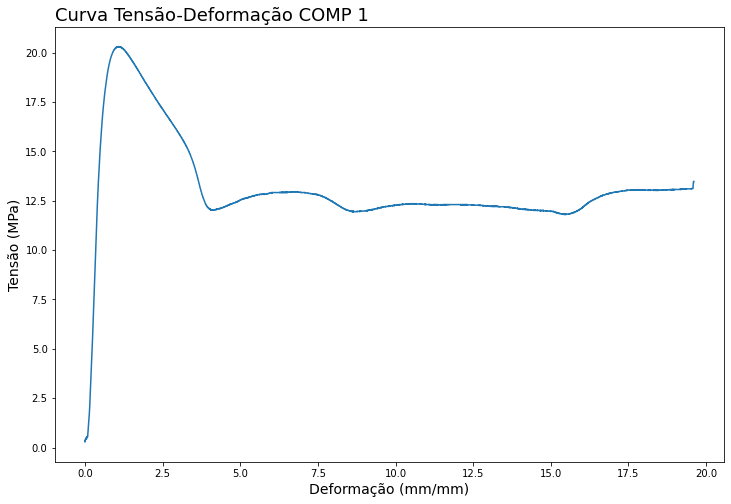

In [87]:
resultados('COMP 1', 0.5)